Import Libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

Load Data From CSV File

In [2]:
my_data = pd.read_csv("1991_advanced.csv")
my_data.head()

,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,isAllNBA
0,SF,3315,21.4,0.618,0.092,0.400,4.7,10.0,7.4,14.9,...,23.5,9.7,2.4,12.2,0.176,4.5,0.1,4.7,5.6,1
1,PF,3302,24.8,0.596,0.009,0.552,9.0,24.5,17.2,14.7,...,30.1,9.9,5.6,15.5,0.225,4.8,0.6,5.4,6.2,1
2,PG,3215,20.9,0.547,0.162,0.246,3.0,8.4,5.7,36.8,...,24.7,7.4,2.5,9.9,0.148,4.5,-0.1,4.4,5.2,0
3,SF,3196,16.6,0.499,0.008,0.283,6.3,15.7,10.7,17.1,...,22.7,2.6,2.9,5.4,0.081,0.5,0.4,0.9,2.3,0
4,PG,3154,18.1,0.492,0.095,0.122,2.8,8.0,5.3,37.6,...,21.8,4.5,1.3,5.9,0.089,3.1,-1.1,2.0,3.2,0


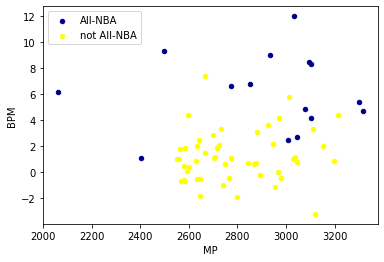

In [3]:
ax = my_data[my_data['isAllNBA'] == 1][0:50].plot(kind='scatter', x='MP', y='BPM', color='DarkBlue', label='All-NBA');
my_data[my_data['isAllNBA'] == 0][0:50].plot(kind='scatter', x='MP', y='BPM', color='Yellow', label='not All-NBA', ax=ax);
plt.show()

Data pre-processing and selection

In [4]:
feature_df = my_data[['Pos','PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].values
le_pos = preprocessing.LabelEncoder()
le_pos.fit(['PG','SG','SF','PF','C'])
feature_df[:,0] = le_pos.transform(feature_df[:,0])
X_train = np.asarray(feature_df)
X_train[0:5]

array([[3, 21.4, 0.618, 0.092, 0.4, 4.7, 10.0, 7.4, 14.9, 2.4, 1.1, 12.6,
        23.5, 9.7, 2.4, 12.2, 0.176, 4.5, 0.1, 4.7, 5.6],
       [1, 24.8, 0.596, 0.009, 0.552, 9.0, 24.5, 17.2, 14.7, 1.4, 1.5,
        10.9, 30.1, 9.9, 5.6, 15.5, 0.225, 4.8, 0.6, 5.4, 6.2],
       [2, 20.9, 0.547, 0.162, 0.246, 3.0, 8.4, 5.7, 36.8, 3.1, 0.2,
        13.6, 24.7, 7.4, 2.5, 9.9, 0.148, 4.5, -0.1, 4.4, 5.2],
       [3, 16.6, 0.499, 0.008, 0.283, 6.3, 15.7, 10.7, 17.1, 2.6, 1.1,
        12.4, 22.7, 2.6, 2.9, 5.4, 0.081, 0.5, 0.4, 0.9, 2.3],
       [2, 18.1, 0.492, 0.095, 0.122, 2.8, 8.0, 5.3, 37.6, 2.2, 0.3,
        10.9, 21.8, 4.5, 1.3, 5.9, 0.089, 3.1, -1.1, 2.0, 3.2]],
      dtype=object)

In [5]:
my_data['isAllNBA'] = my_data['isAllNBA'].astype('int')
y_train = np.asarray(my_data['isAllNBA'])
y_train [0:5]

array([1, 1, 0, 0, 0])

In [6]:
my_data2 = pd.read_csv("1992_advanced.csv")
my_data2.head()

,Pos,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,isAllNBA
0,SF,3346,19.9,0.586,0.110,0.265,4.2,10.4,7.4,12.2,...,23.6,8.1,2.7,10.8,0.155,3.6,0.1,3.7,4.8,1
1,PG,3332,19.1,0.537,0.236,0.244,2.7,7.4,5.1,33.3,...,24.4,7.2,2.0,9.2,0.132,3.9,-1.1,2.8,4.1,1
2,PF,3301,17.0,0.574,0.159,0.220,18.1,34.1,26.2,8.2,...,11.1,5.6,7.0,12.6,0.183,1.9,0.9,2.8,4.0,1
3,SG,3192,15.4,0.538,0.092,0.362,2.9,3.7,3.3,18.9,...,23.6,5.7,2.5,8.2,0.123,1.3,-0.5,0.7,2.2,0
4,SF,3164,21.5,0.555,0.059,0.319,6.9,15.8,11.5,25.8,...,24.6,7.1,5.5,12.7,0.192,4.1,2.0,6.1,6.4,1


In [7]:
feature_df2 = my_data2[['Pos','PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP']].values
le_pos2 = preprocessing.LabelEncoder()
le_pos2.fit(['PG','SG','SF','PF','C'])
feature_df2[:,0] = le_pos2.transform(feature_df2[:,0])
X_test = np.asarray(feature_df2)
X_test[0:5]

array([[3, 19.9, 0.586, 0.11, 0.265, 4.2, 10.4, 7.4, 12.2, 2.4, 1.1,
        10.2, 23.6, 8.1, 2.7, 10.8, 0.155, 3.6, 0.1, 3.7, 4.8],
       [2, 19.1, 0.537, 0.236, 0.244, 2.7, 7.4, 5.1, 33.3, 2.3, 0.2,
        13.2, 24.4, 7.2, 2.0, 9.2, 0.132, 3.9, -1.1, 2.8, 4.1],
       [1, 17.0, 0.574, 0.159, 0.22, 18.1, 34.1, 26.2, 8.2, 1.1, 1.3,
        16.7, 11.1, 5.6, 7.0, 12.6, 0.183, 1.9, 0.9, 2.8, 4.0],
       [4, 15.4, 0.538, 0.092, 0.362, 2.9, 3.7, 3.3, 18.9, 1.2, 0.2,
        11.3, 23.6, 5.7, 2.5, 8.2, 0.123, 1.3, -0.5, 0.7, 2.2],
       [3, 21.5, 0.555, 0.059, 0.319, 6.9, 15.8, 11.5, 25.8, 2.5, 1.8,
        14.0, 24.6, 7.1, 5.5, 12.7, 0.192, 4.1, 2.0, 6.1, 6.4]],
      dtype=object)

In [8]:
my_data2['isAllNBA'] = my_data2['isAllNBA'].astype('int')
y_test = np.asarray(my_data2['isAllNBA'])
y_test [0:5]

array([1, 1, 1, 0, 1])

Modeling

In [9]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [10]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

Evaluation

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       135
           1       0.88      0.47      0.61        15

    accuracy                           0.94       150
   macro avg       0.91      0.73      0.79       150
weighted avg       0.94      0.94      0.93       150

Confusion matrix, without normalization
[[134   1]
 [  8   7]]


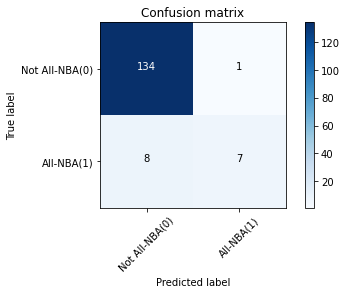

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')

In [14]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9316276879610736

In [15]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.9370629370629371

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       135
           1       0.88      0.47      0.61        15

    accuracy                           0.94       150
   macro avg       0.91      0.73      0.79       150
weighted avg       0.94      0.94      0.93       150

Confusion matrix, without normalization
[[134   1]
 [  8   7]]
Avg F1-score: 0.9316
Jaccard score: 0.9371


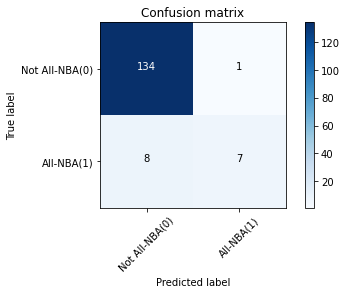

In [16]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf.predict(X_test)
yhat2 [0:5]
cnf_matrix = confusion_matrix(y_test, yhat2, labels=[0, 1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat2))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not All-NBA(0)','All-NBA(1)'],normalize= False,  title='Confusion matrix')
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=0))

In [17]:
yhat[0:100]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y_test[0:100]

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])